##  Week2 복습과제
### 1. Wine 성분 데이터를 바탕으로 와인 품질 분류
### 결정트리, 랜덤포레스트 실습
#### 데이터셋을 다운 받아주세요!


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 1.1 'train.csv'를 불러와 train_df에, 'test.csv'를 불러와 test_df에 저장하시오

In [2]:
train_df = pd.read_csv(r'C:\temp\train.csv')
test_df = pd.read_csv(r'C:\temp\test.csv')

#### 1.2 train 데이터의 3 행을 통해 데이터를 파악하시오

In [3]:
train_df.head(3)

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white


#### 1.3 index 열이 불필요해보입니다. drop을 통해 train과 test 데이터의 index행을 삭제하세요 그리고 확인해주세요

In [4]:
train_df = train_df.drop("index", axis = 1)
test_df = test_df.drop("index", axis = 1)

#### 1.4 train 데이터의 결측치의 유무 여부 또는 평균, min, max, q1, q2, q3, q4 등을 describe 또는 info를 활용해 확인하시오

In [5]:
train_df.info()
train_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   quality               5497 non-null   int64  
 1   fixed acidity         5497 non-null   float64
 2   volatile acidity      5497 non-null   float64
 3   citric acid           5497 non-null   float64
 4   residual sugar        5497 non-null   float64
 5   chlorides             5497 non-null   float64
 6   free sulfur dioxide   5497 non-null   float64
 7   total sulfur dioxide  5497 non-null   float64
 8   density               5497 non-null   float64
 9   pH                    5497 non-null   float64
 10  sulphates             5497 non-null   float64
 11  alcohol               5497 non-null   float64
 12  type                  5497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 558.4+ KB


,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000
mean,5.818992,7.210115,0.338163,0.318543,5.438075,0.055808,30.417682,115.566491,0.994673,3.219502,0.530524,10.504918
std,0.870311,1.287579,0.163224,0.145104,4.756676,0.034653,17.673881,56.288223,0.003014,0.160713,0.149396,1.194524
min,3.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000
25%,5.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000
50%,6.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000
75%,6.000000,7.700000,0.400000,0.390000,8.100000,0.064000,41.000000,155.000000,0.996930,3.320000,0.600000,11.300000
max,9.000000,15.900000,1.580000,1.660000,65.800000,0.610000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


#### 1.5 'quality'열에 어떤 값이 들어있는 지 알아보시오 (예측하고자 하는 y값이 될 열 입니다.) value_counts 사용

In [6]:
train_df['quality'].value_counts()

6    2416
5    1788
7     924
4     186
8     152
3      26
9       5
Name: quality, dtype: int64

#### 1.6 train 데이터와 test 데이터의 'type'이 object로 되어있으니 인코딩을 해주세요 (레이블인코딩, encoder.fit_transform 사용)
#### 잘 인코딩이 되었는지 확인해주세요(value_counts() 사용)

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
encoder= LabelEncoder()

train_df['type'] = encoder.fit_transform(train_df['type'])
test_df['type'] = encoder.fit_transform(test_df['type'])

print(train_df['type'].value_counts())
print(test_df['type'].value_counts())

1    4159
0    1338
Name: type, dtype: int64
1    739
0    261
Name: type, dtype: int64


#### 1.7 독립변수(X)와 종속변수(y)로 분리해주세요(iloc 또는 loc 활용) 그리고 확인해주세요
#### X와 y를 X_train, X_test, y_train, y_test으로 나누시오. (test_size=0.2, random_state=12) 

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = train_df.iloc[:,1:]
y = train_df.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

#### 1.8 DecisionTreeClassifier를 사용해 훈련데이터를 fit 한 후, 테스트 셋으로 예측의 정확도를 구하시오. 
#### DecisionTreeClassifer 의 random_state = 12

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [12]:
dt_clf = DecisionTreeClassifier(random_state = 12)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print(accuracy_score(y_test, pred))

0.6081818181818182


#### 1.9 GridSearchCV를 사용해 최적의 하이퍼 파라미터 조합을 찾으시오

params = {
    'max_depth' : [11, 14, 17, 20, 23, 26, 29],
    'min_samples_split' : [2]
}

In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
params = { 
    'max_depth' : [11, 14, 17, 20, 23, 26, 29], 
    'min_samples_split' : [2] 
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print(grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
{'max_depth': 17, 'min_samples_split': 2}


#### 1.10 테스트 데이터 세트에 대해 예측을 수행해주세요

In [15]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
print(accuracy_score(y_test, pred1))

0.5972727272727273


### 2. 앙상블, 랜덤 포레스트

#### 2.1 개별 모델로 로지스틱 회귀와 KNN을 사용하여 개별 모델의 학습 / 예측/ 평가를 진행해보세요. (solver="liblinear", n_neighbors = 16)

In [16]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [17]:
import warnings
warnings.filterwarnings("ignore")

lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=16)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print(accuracy_score(y_test, pred))

0.48
0.4572727272727273


#### 2.2 로지스틱 회귀와 KNN을 기반으로 하여 보팅 분류기를 만들어 본 후, 학습/예측/평가를 진행해보세요. (VotingClassifier 사용, voting='soft')

In [18]:
import warnings
warnings.filterwarnings("ignore")

vo_clf = VotingClassifier(estimators=[ ('LogisticRegression', lr_clf), ('KNN', knn_clf)], voting='soft')

vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
accuracy_score(y_test, pred)

0.4763636363636364

#### 2.3 randomforestclassifier를 이용하여 훈련 데이터를 fit한 후, 테스트셋의 정확도를 구하세요(random_state=12, max_depth=8)

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [20]:
rf_clf = RandomForestClassifier(random_state=12, max_depth=8)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy_score(y_test, pred)

0.610909090909091

#### 2.4 GridSearchCV를 사용해 최적의 하이퍼 파라미터 조합을 찾으세요.(random_state=12, n_jobs= -1, cv=2)

params = {
    'n_estimators':[10, 50, 100],
    'max_depth' : [2, 8, 14, 20, 26, 32], 
    'min_samples_leaf' : [8, 12, 16, 20], 
    'min_samples_split' : [8, 16, 24, 32]
}

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
params = { 
    'n_estimators':[10, 50, 100], 
    'max_depth' : [2, 8, 14, 20, 26, 32], 
    'min_samples_leaf' : [8, 12, 16, 20], 
    'min_samples_split' : [8, 16, 24, 32]
}

rf_clf = RandomForestClassifier(random_state=12, n_jobs= -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 2, n_jobs = -1)
grid_cv.fit(X_train, y_train)
print(grid_cv.best_params_)

{'max_depth': 14, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 50}


#### 2.5 2.4번에서 구한 최적의 하이퍼 파라미터로 다시 RandomForestClassifier를 학습 시킨 뒤에, 예측 성능을 측정해보세요.

In [23]:
rf_clf1 = RandomForestClassifier(n_estimators = 50, 
                                max_depth = 14,
                                min_samples_leaf = 8,
                                min_samples_split = 8,
                                random_state = 12,
                                n_jobs = -1)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
accuracy_score(y_test,pred)

0.6118181818181818

#### 2.6 피처 주요도를 막대그래프로 시각화해보세요.

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

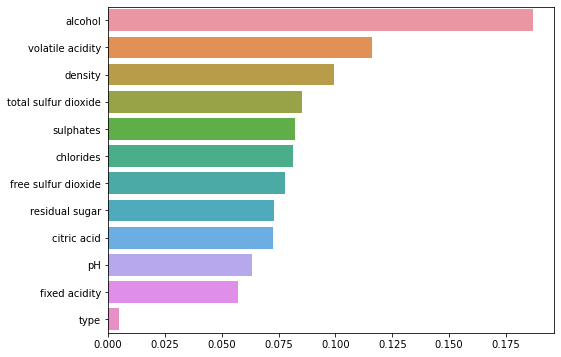

In [25]:
ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

### 3. SVM 사용

#### 3.1 split된 와인 분류 데이터를 가지고 선형 SVM 모델을 만들어 fit 하세요. 정확도도 함께 출력하세요. (C = 5)

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [27]:
lin_svm = SVC(kernel='linear', C=5)
lin_svm.fit(X_train, y_train)
pred = lin_svm.predict(X_test)
print(accuracy_score(y_test, pred))

0.5481818181818182


#### 3.2 와인 품질 분류 선형 SVM 모델에서 GridSearchCV를 이용하여 최적의 C값과 최고 score를 출력하세요.

In [ ]:
from sklearn.model_selection import GridSearchCV
param = {'C':[0.1,0.5,1,5,10,40]}

In [ ]:
GS = GridSearchCV(SVC(kernel='linear'), param, cv = 2)
GS.fit(X_train, y_train)
print(GS.best_params_)
print(GS.best_score_)

#### 3.3 위에서 구한 최적 파라미터로 다시 예측을 진행하세요. 정확도도 함께 출력하세요.(best_estimator_ 이용)

In [ ]:
estimator = GS.best_estimator_
pred1 = estimator.predict(X_test)
print(accuracy_score(y_test, pred1))

#### 3.4 GridSearchCV를 이용하여 최적의 gamma, C 값을 찾고 가우시안 SVM 모델을 만들어 fit 하세요.

In [28]:
params={'C':[0.1,0.5,1,5,10,40,100],
        'gamma':[0.1,0.25,0.5,0.75,1,10]}

In [29]:
GS1 = GridSearchCV(SVC(kernel='rbf'), params, cv=2)
GS1.fit(X_train, y_train)
print(GS1.best_params_)
print(GS1.best_score_)

estimator1 = GS1.best_estimator_
pred2 = estimator1.predict(X_test)
print(accuracy_score(y_test, pred2))

{'C': 40, 'gamma': 0.5}
0.5198987173009818
0.5790909090909091
